### Ex1

In [1]:
# import libs
install.packages('psych')
install.packages('tidyverse')
install.packages('corrplot')
install.packages('ggplot2')
install.packages('caret')
install.packages('Metrics')
install.packages('e1071')
install.packages('glmnet')

library(psych)          # alternative package to describe your data
library(tidyverse)      # easy way to subset your data
library(corrplot)       # to draw correlation plots
library(ggplot2)        # to plot graphs
library(caret)          # to run machine learning models
library(Metrics)        # to calculate RMSE
library(e1071)          # for statistical analyses
library(glmnet)         # for statistical analyses

options(scipen=999) # turn off scientific notation

Installing package into 'C:/Users/Max/AppData/Local/R/win-library/4.5'
(as 'lib' is unspecified)



package 'psych' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Max\AppData\Local\Temp\RtmpOkqu8Z\downloaded_packages


Installing package into 'C:/Users/Max/AppData/Local/R/win-library/4.5'
(as 'lib' is unspecified)



package 'tidyverse' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Max\AppData\Local\Temp\RtmpOkqu8Z\downloaded_packages


Installing package into 'C:/Users/Max/AppData/Local/R/win-library/4.5'
(as 'lib' is unspecified)



package 'corrplot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Max\AppData\Local\Temp\RtmpOkqu8Z\downloaded_packages


Installing package into 'C:/Users/Max/AppData/Local/R/win-library/4.5'
(as 'lib' is unspecified)



package 'ggplot2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Max\AppData\Local\Temp\RtmpOkqu8Z\downloaded_packages


Installing package into 'C:/Users/Max/AppData/Local/R/win-library/4.5'
(as 'lib' is unspecified)



package 'caret' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Max\AppData\Local\Temp\RtmpOkqu8Z\downloaded_packages


Installing package into 'C:/Users/Max/AppData/Local/R/win-library/4.5'
(as 'lib' is unspecified)



package 'Metrics' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Max\AppData\Local\Temp\RtmpOkqu8Z\downloaded_packages


Installing package into 'C:/Users/Max/AppData/Local/R/win-library/4.5'
(as 'lib' is unspecified)



package 'e1071' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Max\AppData\Local\Temp\RtmpOkqu8Z\downloaded_packages


Installing package into 'C:/Users/Max/AppData/Local/R/win-library/4.5'
(as 'lib' is unspecified)



package 'glmnet' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Max\AppData\Local\Temp\RtmpOkqu8Z\downloaded_packages


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ ggplot2::%+%()   masks psych::%+%()
✖ ggplot2::alpha() masks psych::alpha()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
corrplot 0.95 loaded

Loading required package: lattice


Attaching package: 'caret'


The following object is masked from 'package:purrr':

    lift



Attaching package: 'Metrics'


The following objects are masked from 'package:caret':

    precision, recall


Loading required package: Matrix


Attaching package: 'Matrix'


The following objects are masked from 'package:tidyr':

    expand,

In [2]:
df = read.csv('creditcard.csv')[1:20000,]


In [3]:
str(df) # check structure of the data

'data.frame':	20000 obs. of  31 variables:
 $ Time  : num  0 0 1 1 2 2 4 7 7 9 ...
 $ V1    : num  -1.36 1.192 -1.358 -0.966 -1.158 ...
 $ V2    : num  -0.0728 0.2662 -1.3402 -0.1852 0.8777 ...
 $ V3    : num  2.536 0.166 1.773 1.793 1.549 ...
 $ V4    : num  1.378 0.448 0.38 -0.863 0.403 ...
 $ V5    : num  -0.3383 0.06 -0.5032 -0.0103 -0.4072 ...
 $ V6    : num  0.4624 -0.0824 1.8005 1.2472 0.0959 ...
 $ V7    : num  0.2396 -0.0788 0.7915 0.2376 0.5929 ...
 $ V8    : num  0.0987 0.0851 0.2477 0.3774 -0.2705 ...
 $ V9    : num  0.364 -0.255 -1.515 -1.387 0.818 ...
 $ V10   : num  0.0908 -0.167 0.2076 -0.055 0.7531 ...
 $ V11   : num  -0.552 1.613 0.625 -0.226 -0.823 ...
 $ V12   : num  -0.6178 1.0652 0.0661 0.1782 0.5382 ...
 $ V13   : num  -0.991 0.489 0.717 0.508 1.346 ...
 $ V14   : num  -0.311 -0.144 -0.166 -0.288 -1.12 ...
 $ V15   : num  1.468 0.636 2.346 -0.631 0.175 ...
 $ V16   : num  -0.47 0.464 -2.89 -1.06 -0.451 ...
 $ V17   : num  0.208 -0.115 1.11 -0.684 -0.237 ...
 $ V1

In [4]:
df$Class = as.factor(df$Class) # convert Class to factor
table(df$Class) # show the class distribution as a table


    0     1 
19915    85 

In [5]:
sapply(df, function(x) sum(is.na(x))) # check for missing values

Time     V1     V2     V3     V4     V5     V6     V7     V8     V9    V10 
     0      0      0      0      0      0      0      0      0      0      0 
   V11    V12    V13    V14    V15    V16    V17    V18    V19    V20    V21 
     0      0      0      0      0      0      0      0      0      0      0 
   V22    V23    V24    V25    V26    V27    V28 Amount  Class 
     0      0      0      0      0      0      0      0      0

In [6]:
df %>%
    keep(is.numeric) %>% # keep only numeric columns
    describe

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Time,1,20000,15569.833650003,10540.8349279,15012.50000000,15625.3258750008,16157.37480000,0.000000,30717.000000,30717.000000,-0.03091137,-1.53910777,74.534958569
V1,2,20000,-0.245246371,1.8914431,-0.30252069,0.0210279721,1.94219525,-30.552380,1.960497,32.512877,-4.45174299,43.66193675,0.013374523
V2,3,20000,0.240540131,1.5300655,0.21904194,0.2455351338,0.88450074,-40.978852,16.713389,57.692241,-2.31742985,71.99608351,0.010819197
V3,4,20000,0.745641746,1.7679167,0.89867176,0.9086564641,0.90137224,-31.103685,4.101716,35.205401,-7.07084394,86.43009141,0.012501059
V4,5,20000,0.277184456,1.4651851,0.22505086,0.2352806144,1.32306160,-5.172595,11.927512,17.100106,0.66352493,3.34909350,0.010360424
V5,6,20000,-0.163955745,1.4306489,-0.20068872,-0.1868956727,0.80557455,-32.092129,34.099309,66.191438,-1.64912838,76.81624920,0.010116215
V6,7,20000,0.092962417,1.3320718,-0.17529328,-0.0748147523,0.80676213,-23.496714,21.393069,44.889783,0.83806656,15.52565431,0.009419170
V7,8,20000,-0.145576842,1.3369816,-0.07246000,-0.0813042337,0.77837576,-26.548144,34.303177,60.851321,-4.47169452,96.13918245,0.009453888
V8,9,20000,0.022047506,1.3475613,0.02399190,0.0572033366,0.32333996,-41.484823,20.007208,61.492031,-4.37924610,142.15495272,0.009528697


#### Ex2

In [ ]:
describeBy(df, group = df$Class) # describe by Class


 Descriptive statistics by group 
group: 0
       vars     n     mean       sd   median  trimmed      mad    min      max
Time      1 19915 15561.87 10548.18 15001.00 15615.32 16182.58   0.00 30717.00
V1        2 19915    -0.21     1.69    -0.30     0.03     1.94 -28.34     1.96
V2        3 19915     0.21     1.44     0.21     0.24     0.88 -40.98    14.85
V3        4 19915     0.80     1.40     0.90     0.92     0.90 -27.75     4.10
V4        5 19915     0.25     1.40     0.22     0.23     1.32  -5.17    10.46
V5        6 19915    -0.14     1.29    -0.20    -0.18     0.80 -32.09    34.10
V6        7 19915     0.10     1.32    -0.17    -0.07     0.81 -23.50    21.39
V7        8 19915    -0.11     1.12    -0.07    -0.08     0.78 -26.55    34.30
V8        9 19915     0.00     1.25     0.02     0.06     0.32 -41.48    17.57
V9       10 19915     0.65     1.25     0.62     0.61     1.20  -4.53    10.39
V10      11 19915    -0.19     1.10    -0.27    -0.24     0.66 -11.21    12.70
V11     

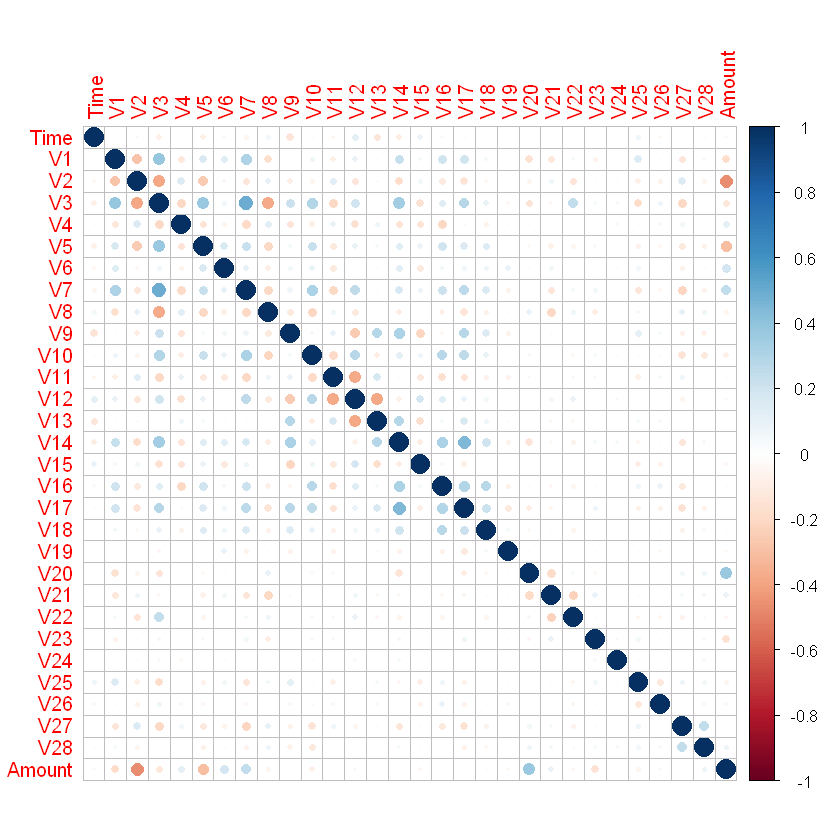

In [9]:
corrplot(cor(df[, -ncol(df)]), method = 'circle') # correlation plot

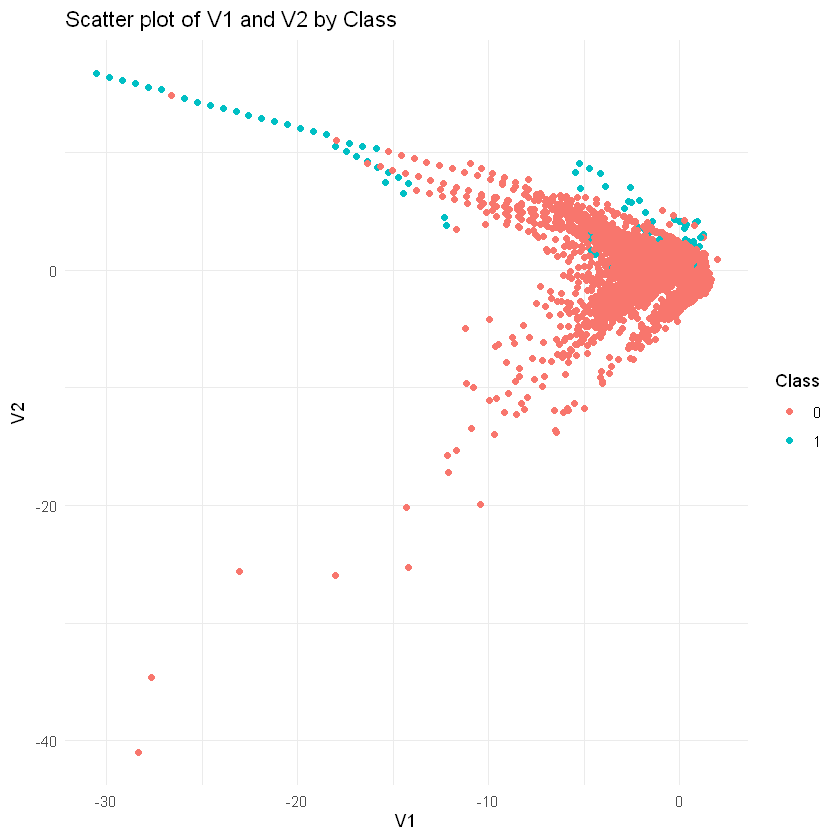

In [10]:
ggplot(df, aes(x = V1, y = V2, color = Class)) +
    geom_point() + 
    labs(title = 'Scatter plot of V1 and V2 by Class') +
    theme_minimal() # scatter plot of two variables

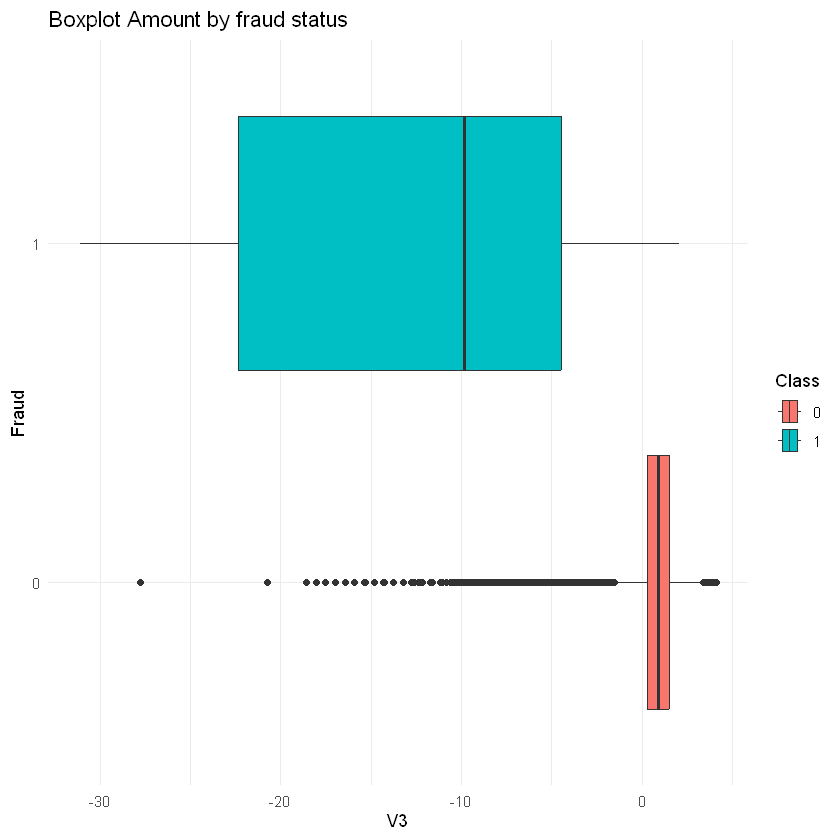

In [13]:
# make a boxplot of V3
ggplot(df, aes(y = Class, x = V3)) +
    geom_boxplot(aes(fill=Class)) +
    labs(title = 'Boxplot Amount by fraud status') +
    ylab('Fraud') +
    xlab('V3') +
    theme_minimal() # boxplot of V3 by Class

Warning message in scale_x_log10():
"log-10 transformation introduced infinite values."
Warning message:
"Removed 194 rows containing non-finite outside the scale range
(`stat_boxplot()`)."


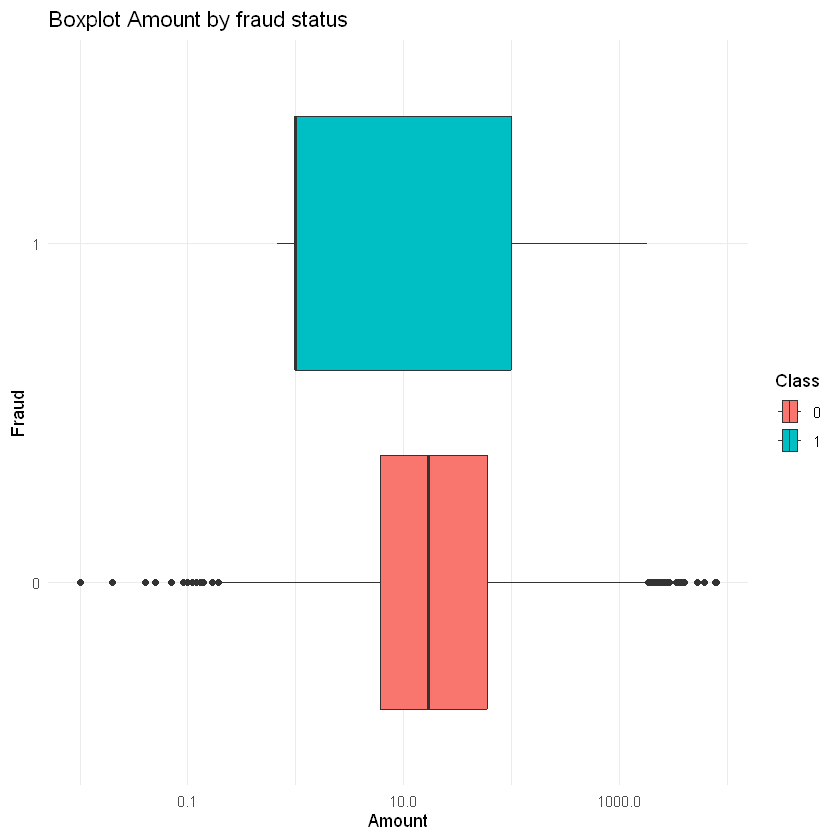

In [18]:
ggplot(df, aes(y = Class, x = Amount, group = Class)) +
    geom_boxplot(aes(fill=Class)) +
    scale_x_log10() +
    labs(title = 'Boxplot Amount by fraud status') +
    ylab('Fraud') +
    xlab('Amount') +
    theme_minimal() # boxplot of Amount by Fraud status

#### Ex3

In [19]:
# set stability seed
set.seed (123456789)
dt = sort(sample(nrow(df), nrow(df)*.7)) ## 70% in train set
train<-df[dt,]
test<-df[-dt,]

In [21]:
# specify the control method
ctrl <- trainControl(
    method = "repeatedcv",
    number = 10,
    repeats = 3)

#### Ex3.1

In [22]:
# run lm
lm_model <- train(Class ~ ., data = train,
                  method = "glm",
                  preProcess = c("center"),
                  trControl = ctrl)

lm_model
varImp(lm_model) # variable importance

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

Generalized Linear Model 

14000 samples
   30 predictor
    2 classes: '0', '1' 

Pre-processing: centered (30) 
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 12600, 12599, 12600, 12601, 12600, 12600, ... 
Resampling results:

  Accuracy   Kappa    
  0.9983571  0.8003982


glm variable importance

  only 20 most important variables shown (out of 30)

       Overall
V27    100.000
Time    63.208
Amount  45.406
V24     26.371
V3      22.481
V28     20.484
V26     19.799
V6      13.662
V25     13.272
V23     11.454
V8      10.539
V20      8.008
V14      5.996
V5       4.785
V4       4.741
V21      3.719
V7       3.557
V10      3.157
V22      2.592
V13      2.321

k-Nearest Neighbors 

14000 samples
   30 predictor
    2 classes: '0', '1' 

Pre-processing: centered (30), scaled (30) 
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 12601, 12600, 12600, 12600, 12601, 12600, ... 
Resampling results across tuning parameters:

  k  Accuracy   Kappa    
  5  0.9988811  0.8538961
  7  0.9986192  0.8144657
  9  0.9982859  0.7787003

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 5.

ROC curve variable importance

  only 20 most important variables shown (out of 30)

    Importance
V14     100.00
V4       99.09
V3       96.49
V12      94.04
V10      93.34
V11      92.68
V2       90.61
V9       87.70
V6       87.37
V16      78.71
V7       78.61
V27      70.75
V17      68.16
V20      66.74
V1       63.63
V8       52.61
V18      51.42
V5       49.36
V28      47.74
V21      44.96

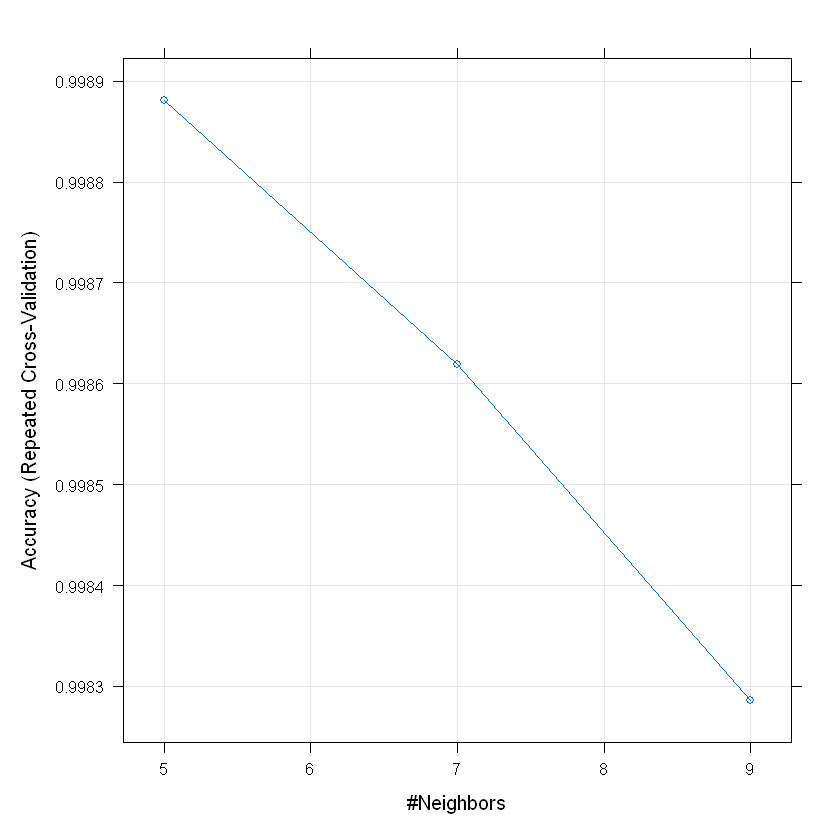

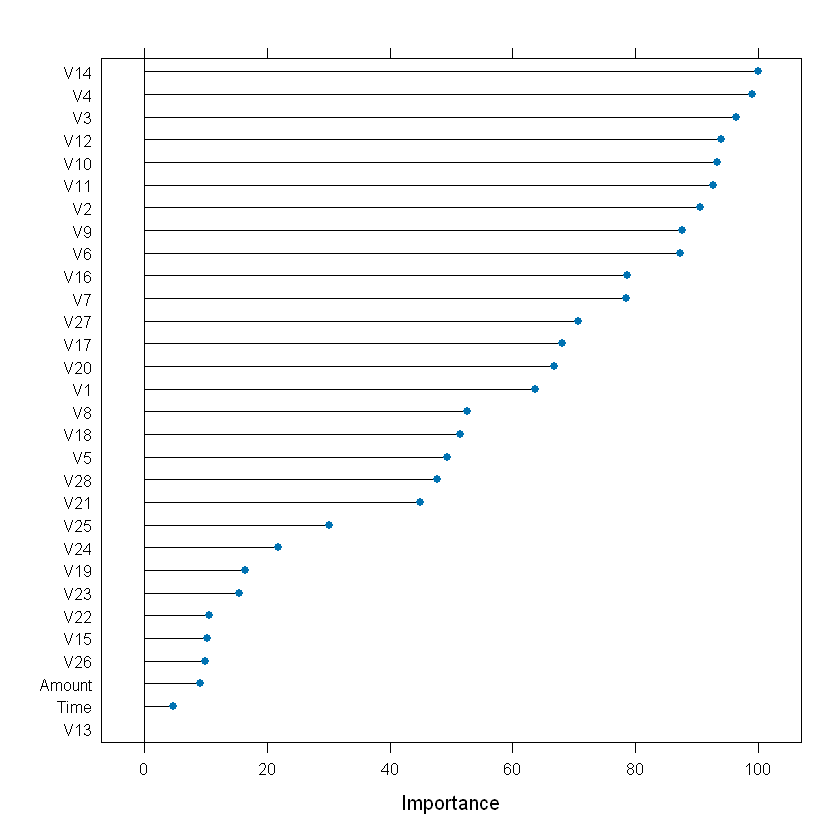

In [23]:
#run knn
knn_model <- train(Class ~ ., data = train,
                   method = "knn",
                   preProcess = c("center", "scale"),
                   trControl = ctrl)

knn_model
plot(knn_model) # plot knn model
varImp(knn_model) # variable importance
plot(varImp(knn_model)) # plot variable importance

glmnet 

14000 samples
   30 predictor
    2 classes: '0', '1' 

Pre-processing: centered (30), scaled (30) 
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 12600, 12600, 12600, 12599, 12601, 12600, ... 
Resampling results across tuning parameters:

  lambda  Accuracy   Kappa    
  0.0001  0.9982381  0.7875388
  0.0112  0.9978334  0.6664098
  0.0223  0.9958335  0.1115086
  0.0334  0.9955715  0.0000000
  0.0445  0.9955715  0.0000000
  0.0556  0.9955715  0.0000000
  0.0667  0.9955715  0.0000000
  0.0778  0.9955715  0.0000000
  0.0889  0.9955715  0.0000000
  0.1000  0.9955715  0.0000000

Tuning parameter 'alpha' was held constant at a value of 1
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were alpha = 1 and lambda = 0.0001.

glmnet variable importance

  only 20 most important variables shown (out of 30)

     Overall
V4   100.000
V14   54.909
V6    50.376
V5    49.511
V27   47.733
V26   42.414
Time  42.182
V19   41.350
V16   37.775
V10   32.472
V3    29.223
V9    24.604
V2    20.709
V23   20.038
V13   16.553
V1    14.611
V15   11.860
V21    9.192
V24    6.452
V25    5.910

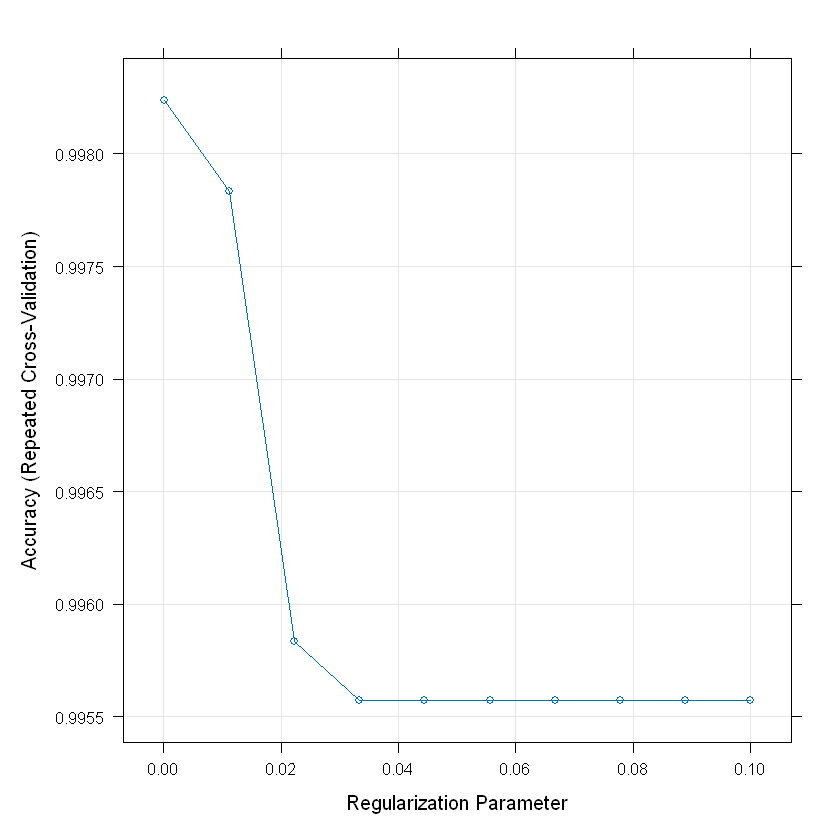

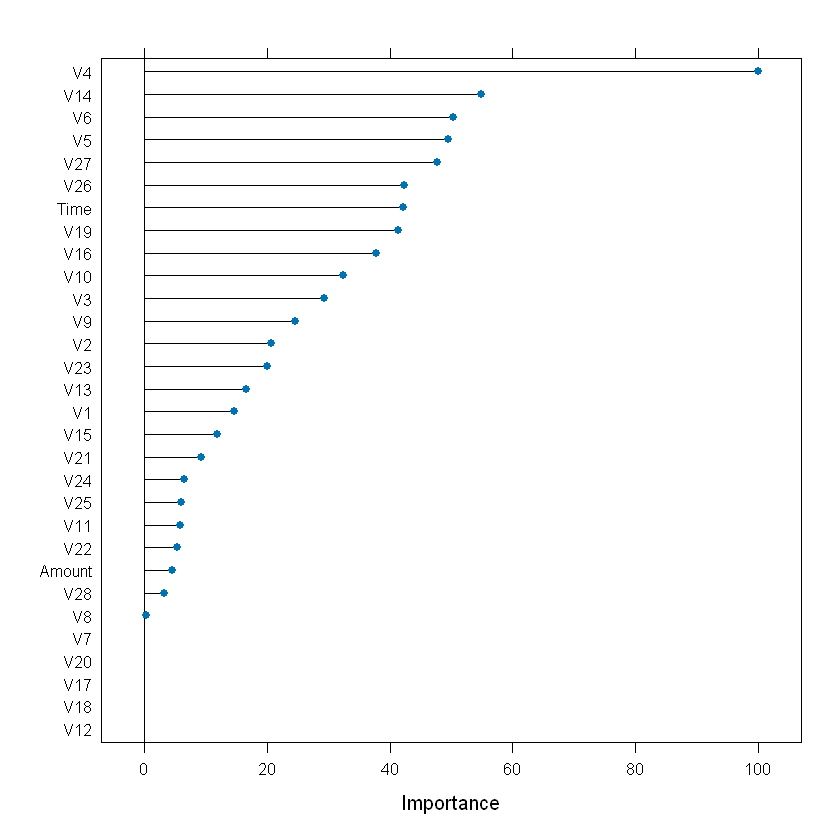

In [24]:
# run lasso
lasso_model <- train(Class ~ ., data = train,
                     method = "glmnet",
                     preProcess = c("center", "scale"),
                     trControl = ctrl,
                     family = "binomial",
                     tuneGrid = expand.grid(alpha = 1, lambda = seq(0.0001, 0.1, length = 10)))

lasso_model
plot(lasso_model) # plot lasso model
varImp(lasso_model) # variable importance
plot(varImp(lasso_model)) # plot variable importance

#### Ex3.4

In [25]:
# check performance of the models
lm_pred <- predict(lm_model, newdata = test)
knn_pred <- predict(knn_model, newdata = test)
lasso_pred <- predict(lasso_model, newdata = test)

# display confusion matrices
print("LM")
confusionMatrix(lm_pred, test$Class)
print("KNN")
confusionMatrix(knn_pred, test$Class)
print("LASSO")
confusionMatrix(lasso_pred, test$Class)

[1] "LM"


Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 5974    8
         1    3   15
                                          
               Accuracy : 0.9982          
                 95% CI : (0.9967, 0.9991)
    No Information Rate : 0.9962          
    P-Value [Acc > NIR] : 0.004371        
                                          
                  Kappa : 0.7308          
                                          
 Mcnemar's Test P-Value : 0.227800        
                                          
            Sensitivity : 0.9995          
            Specificity : 0.6522          
         Pos Pred Value : 0.9987          
         Neg Pred Value : 0.8333          
             Prevalence : 0.9962          
         Detection Rate : 0.9957          
   Detection Prevalence : 0.9970          
      Balanced Accuracy : 0.8258          
                                          
       'Positive' Class : 0               
                        

[1] "KNN"


Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 5976    9
         1    1   14
                                          
               Accuracy : 0.9983          
                 95% CI : (0.9969, 0.9992)
    No Information Rate : 0.9962          
    P-Value [Acc > NIR] : 0.001948        
                                          
                  Kappa : 0.736           
                                          
 Mcnemar's Test P-Value : 0.026857        
                                          
            Sensitivity : 0.9998          
            Specificity : 0.6087          
         Pos Pred Value : 0.9985          
         Neg Pred Value : 0.9333          
             Prevalence : 0.9962          
         Detection Rate : 0.9960          
   Detection Prevalence : 0.9975          
      Balanced Accuracy : 0.8043          
                                          
       'Positive' Class : 0               
                        

[1] "LASSO"


Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 5974   12
         1    3   11
                                          
               Accuracy : 0.9975          
                 95% CI : (0.9959, 0.9986)
    No Information Rate : 0.9962          
    P-Value [Acc > NIR] : 0.05168         
                                          
                  Kappa : 0.5934          
                                          
 Mcnemar's Test P-Value : 0.03887         
                                          
            Sensitivity : 0.9995          
            Specificity : 0.4783          
         Pos Pred Value : 0.9980          
         Neg Pred Value : 0.7857          
             Prevalence : 0.9962          
         Detection Rate : 0.9957          
   Detection Prevalence : 0.9977          
      Balanced Accuracy : 0.7389          
                                          
       'Positive' Class : 0               
                        